# Clustering of Factor Analysis Results

In [35]:
library(readxl)
library(tidyverse) #data Manipulation
library(magrittr)
library(cluster) #Clustering algorithms
#install.packages('cluster.datasets')
library(cluster.datasets)
library(cowplot)
#install.packages('clValid')
library(clValid)
#install.packages('ggfortify')
library(ggfortify)
#install.packages('clustree')
library(clustree)
library(factoextra)#Clustering Algorithms & Visualization
library(FactoMineR)
library(gridExtra)
library(corrplot)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
#install.packages('NbClust')
library(NbClust)
#install.packages('writexl')
library(writexl)
library(GGally)
#install.packages('ggiraphExtra')
library(ggiraphExtra)
library(knitr)
library(kableExtra)
library("RColorBrewer")

install.packages('clusterSim')
library(clusterSim)

Installing package into 'C:/Users/hichul/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

also installing the dependencies 'miniUI', 'pixmap', 'manipulateWidget', 'ade4', 'rgl', 'R2HTML'




package 'miniUI' successfully unpacked and MD5 sums checked
package 'pixmap' successfully unpacked and MD5 sums checked
package 'manipulateWidget' successfully unpacked and MD5 sums checked
package 'ade4' successfully unpacked and MD5 sums checked
package 'rgl' successfully unpacked and MD5 sums checked
package 'R2HTML' successfully unpacked and MD5 sums checked
package 'clusterSim' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hichul\AppData\Local\Temp\RtmpiwLFNh\downloaded_packages


Warning message:
"package 'clusterSim' was built under R version 4.0.4"
Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




Country,dugwell,spring,piped_home,piped_yard_tap,cheap_commercial,surface_water,thirthy_min_less_travel
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,0.572418217,0.27948505,0.4740642,0.48905269,0.3327190,0.6406390,0.5244550
Albania,0.173347287,0.16631234,0.7812555,0.21604457,0.3179487,0.2668756,0.5813036
Angola,0.555402896,0.26567935,0.6221088,0.51799504,0.4010244,0.8739405,0.4280040
Armenia,0.006249719,0.01802207,0.9992766,0.05567089,0.0000000,0.1978413,0.5088645
Azerbaijan,0.172305543,0.17209406,0.6946237,0.41693952,0.2060016,0.4634648,0.4247652
Bangladesh,0.116506831,0.08746231,0.0000000,0.29168400,0.1829046,0.1907371,0.5876124
Benin,0.637942432,0.21134166,0.4559905,0.49267200,0.2827230,0.4847495,0.6788342


   Country             dugwell           spring         piped_home    
 Length:73          Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:0.1733   1st Qu.:0.1649   1st Qu.:0.4645  
 Mode  :character   Median :0.4295   Median :0.2146   Median :0.5688  
                    Mean   :0.3889   Mean   :0.2571   Mean   :0.5841  
                    3rd Qu.:0.5554   3rd Qu.:0.3083   3rd Qu.:0.7118  
                    Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 piped_yard_tap   cheap_commercial surface_water    thirthy_min_less_travel
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000         
 1st Qu.:0.3541   1st Qu.:0.2178   1st Qu.:0.2499   1st Qu.:0.4500         
 Median :0.4891   Median :0.2774   Median :0.3684   Median :0.5759         
 Mean   :0.4636   Mean   :0.2970   Mean   :0.3939   Mean   :0.5628         
 3rd Qu.:0.5929   3rd Qu.:0.3286   3rd Qu.:0.5159   3rd Qu.:0.6788         
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00

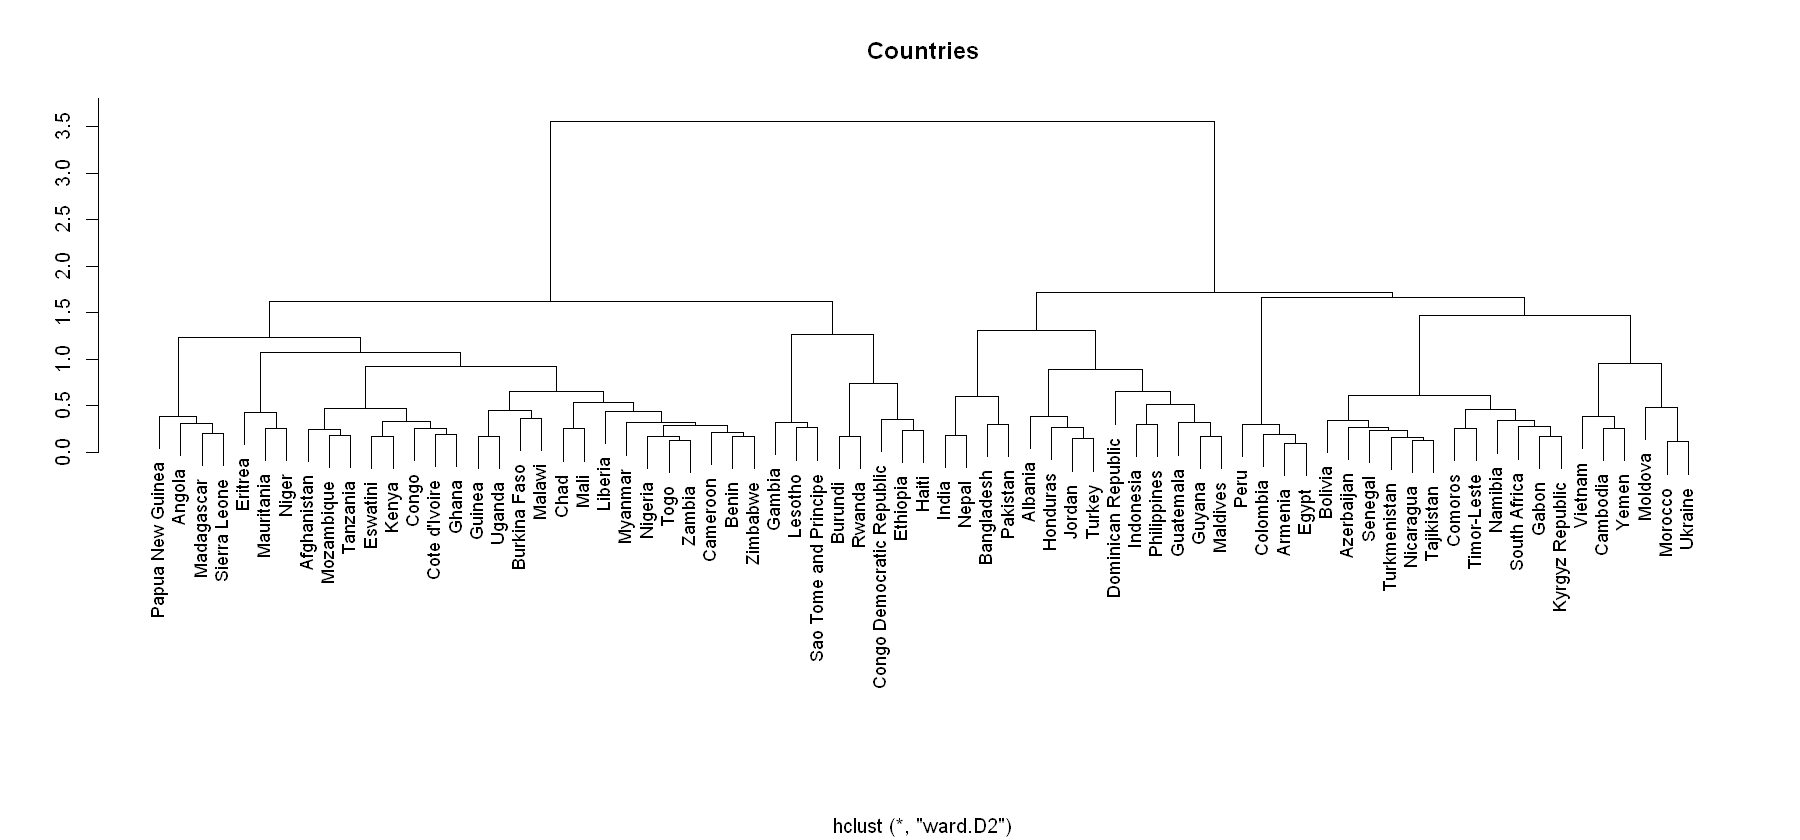

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


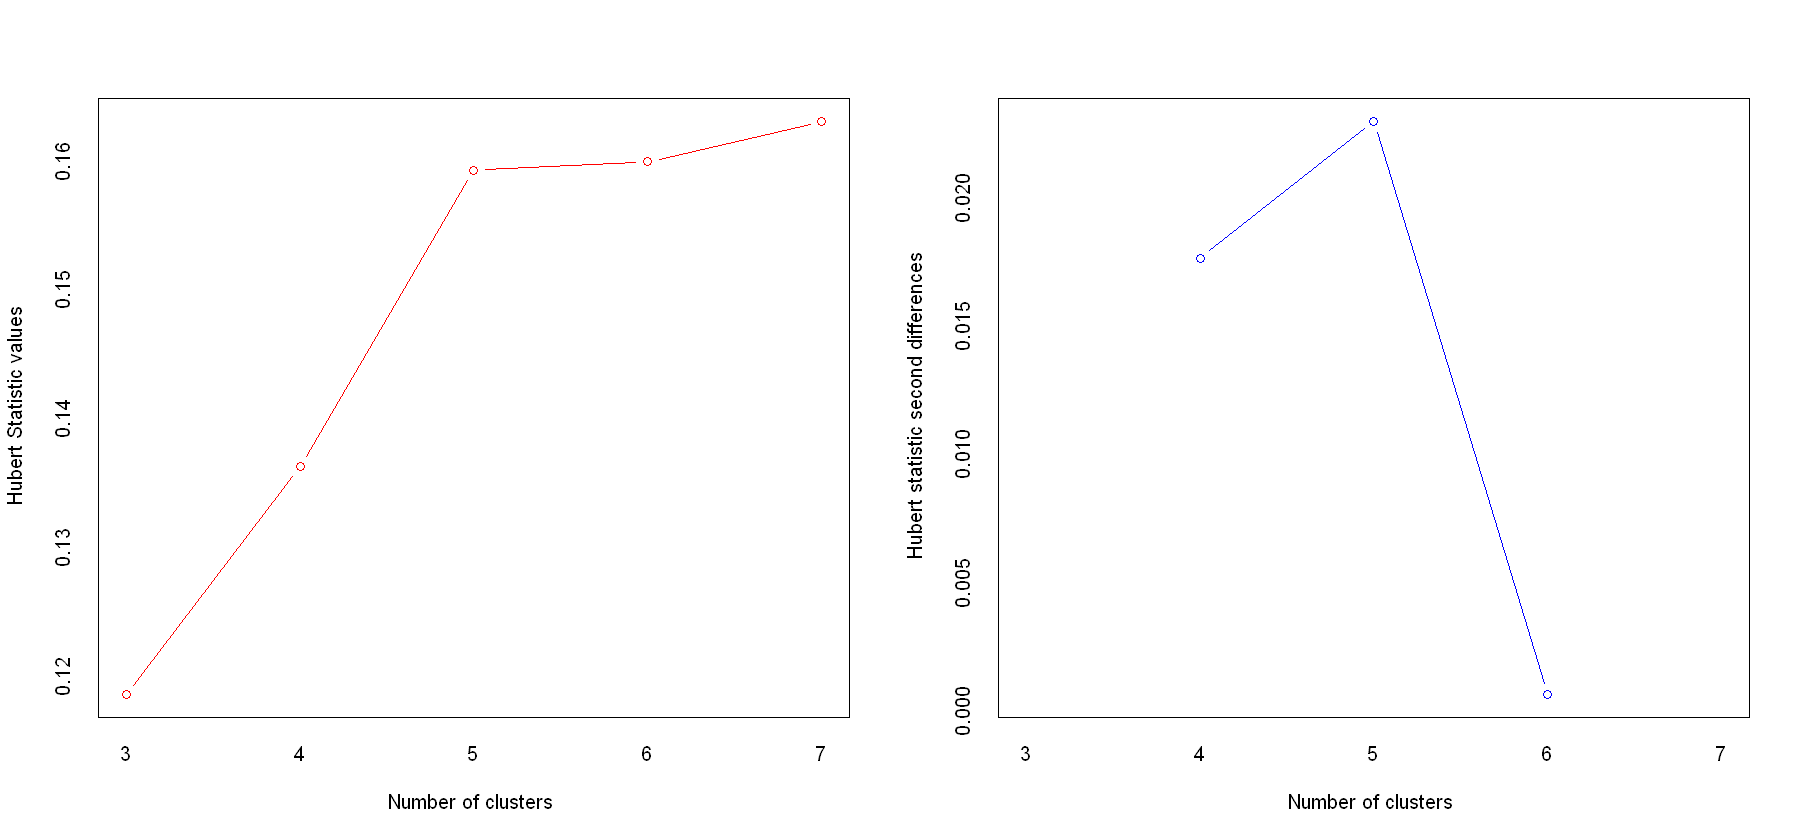

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 3 as the best number of clusters 
* 4 proposed 4 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 
* 3 proposed 6 as the best number of clusters 
* 10 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  7 
 
 
******************************************************************* 


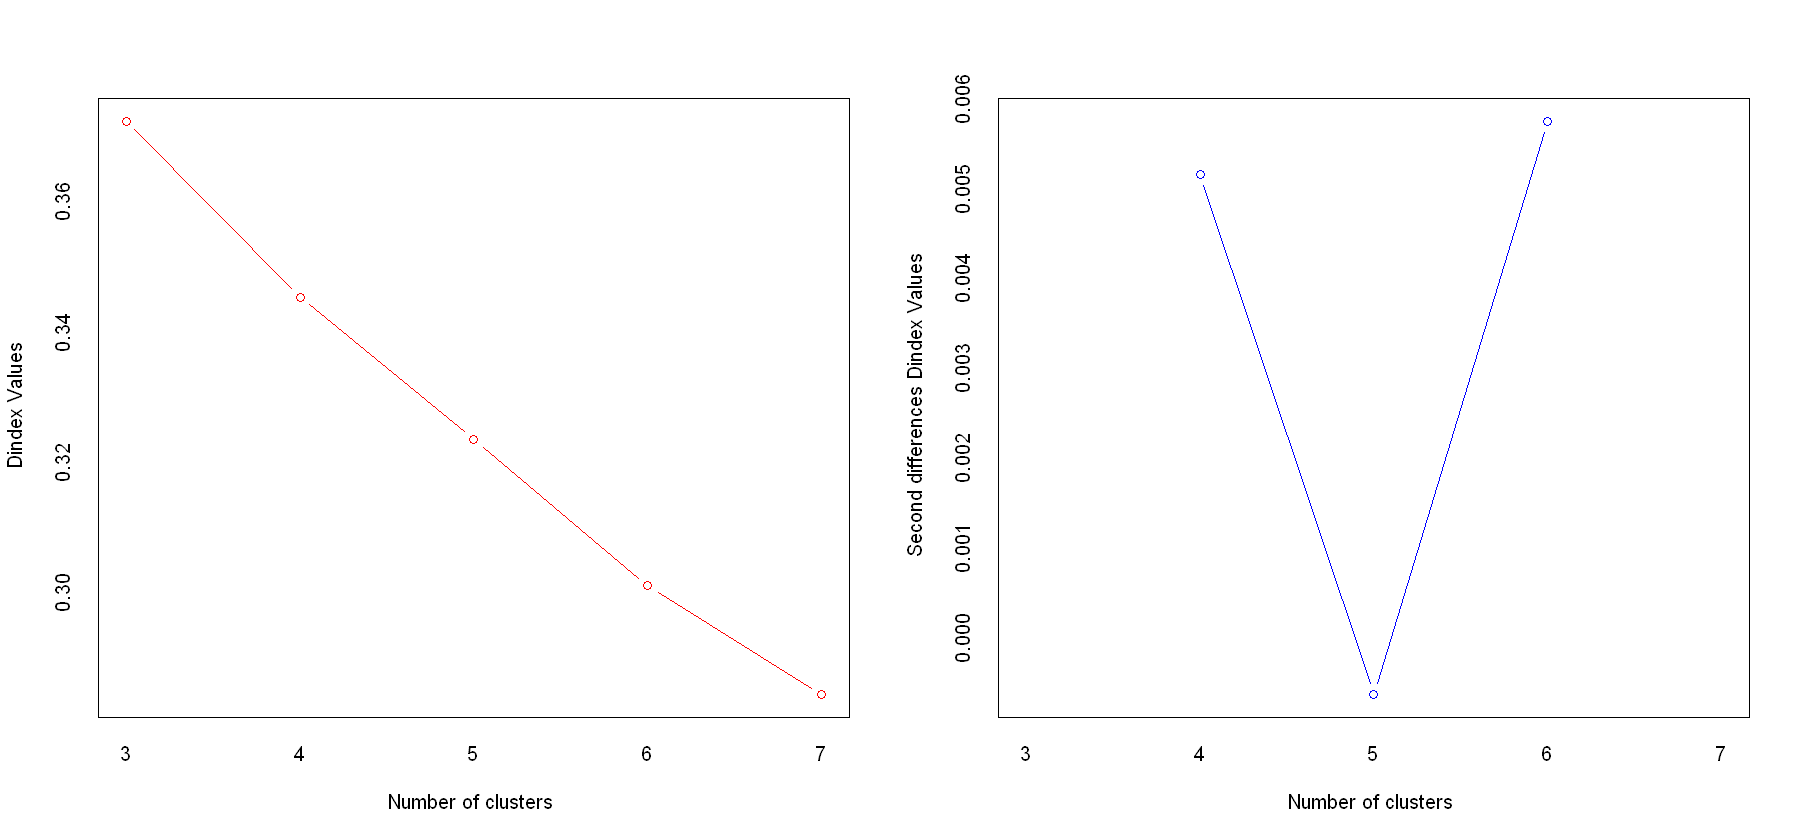

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


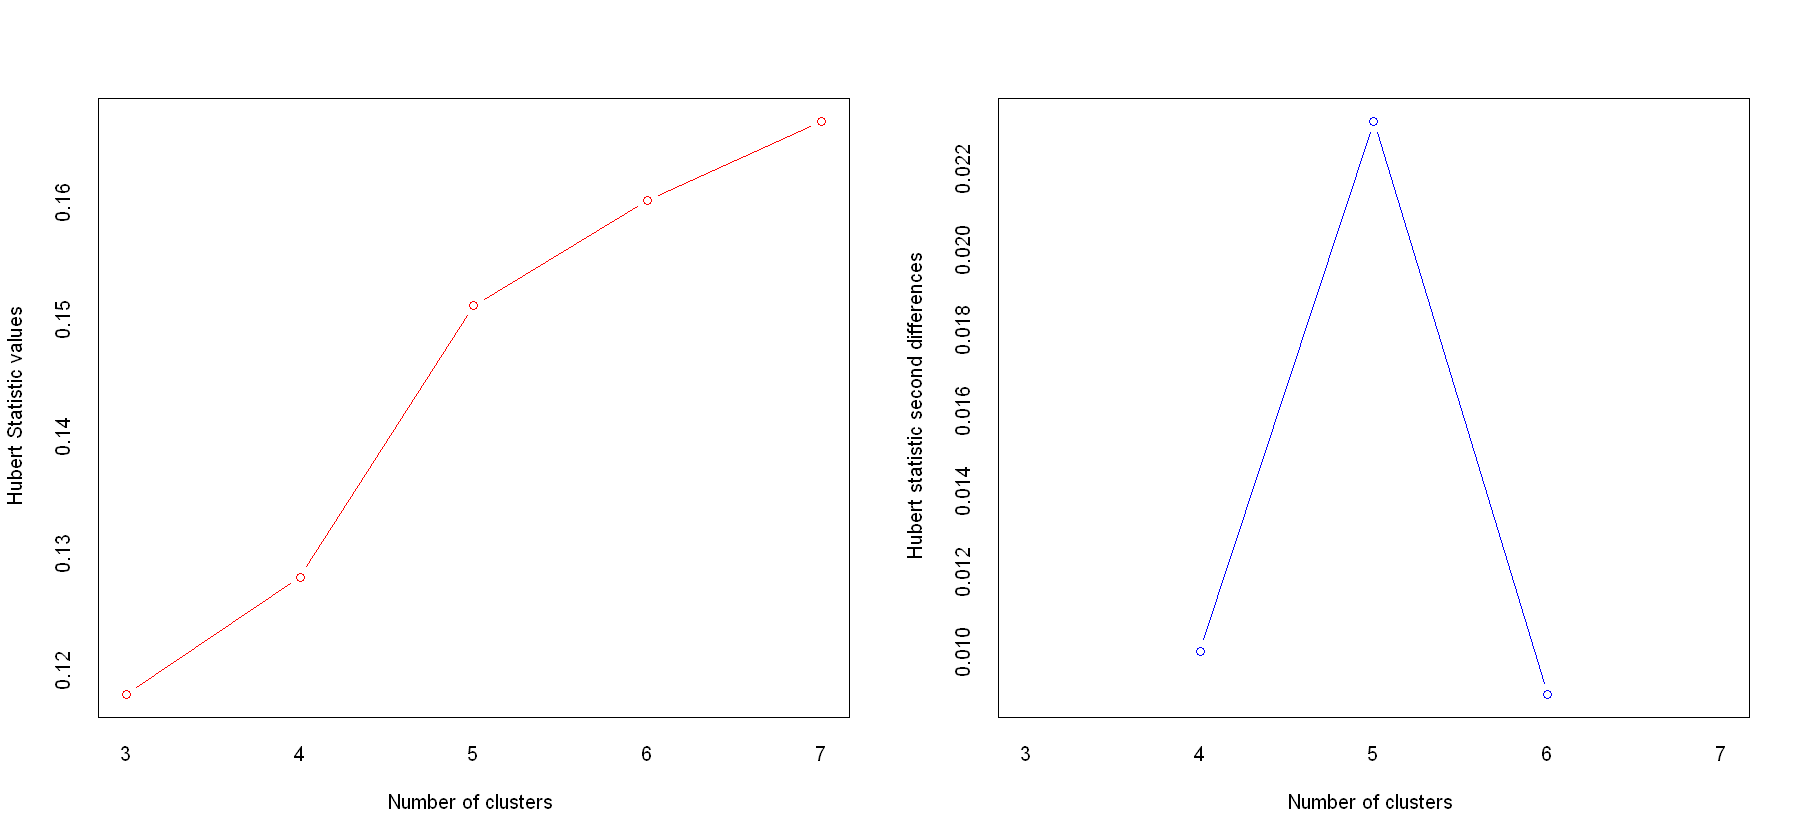

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 3 as the best number of clusters 
* 7 proposed 4 as the best number of clusters 
* 3 proposed 5 as the best number of clusters 
* 1 proposed 6 as the best number of clusters 
* 9 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  7 
 
 
******************************************************************* 


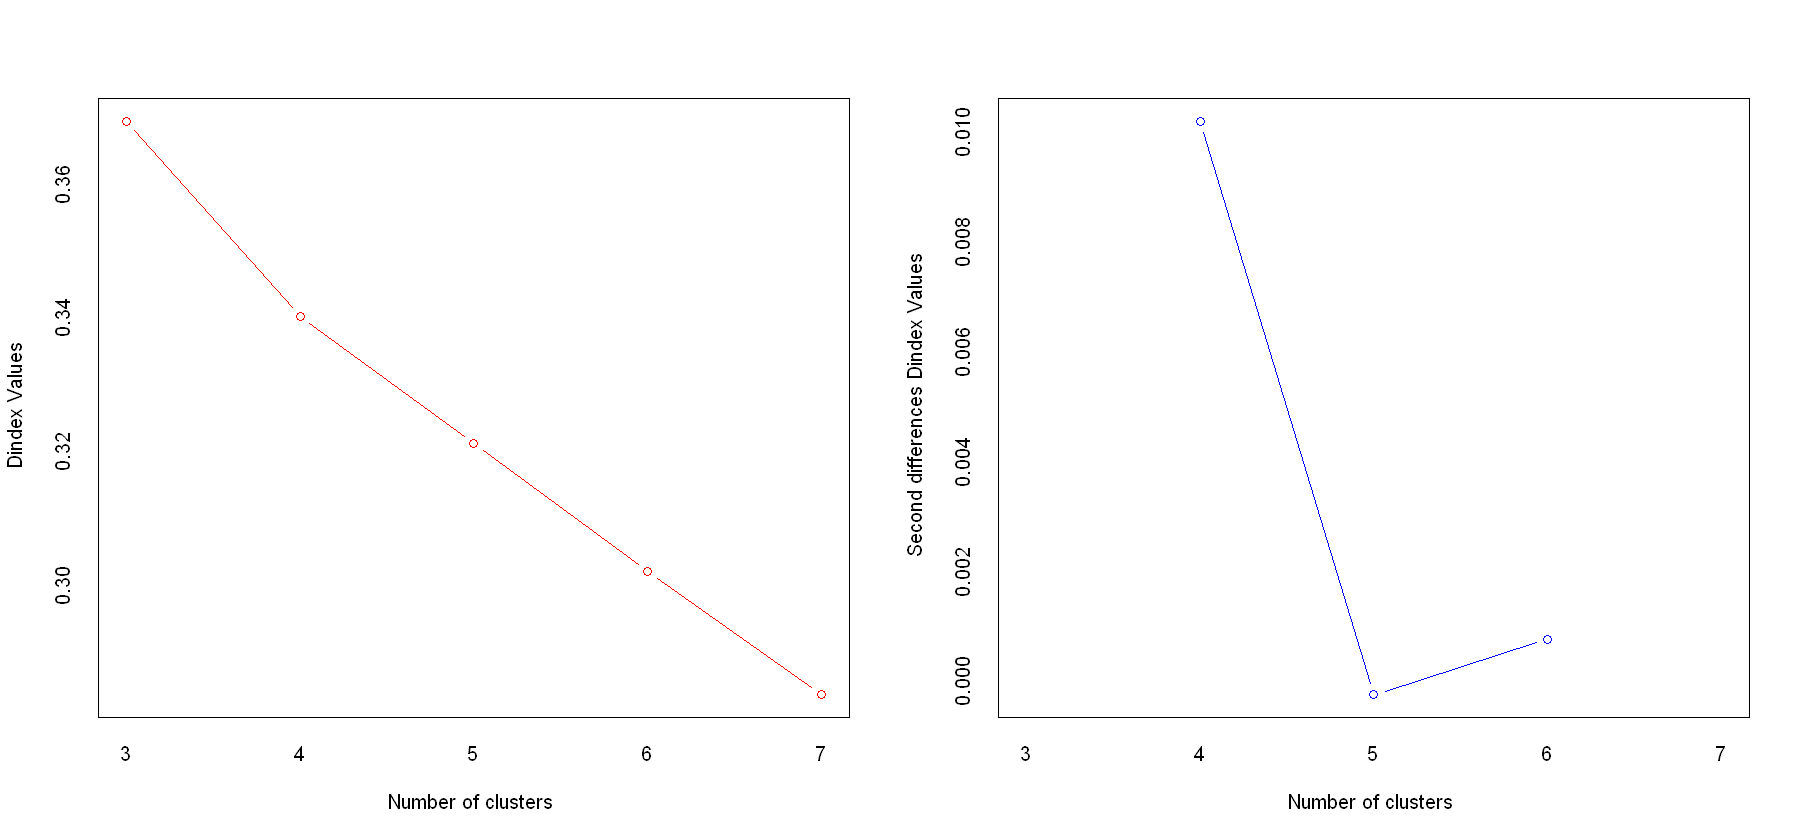

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


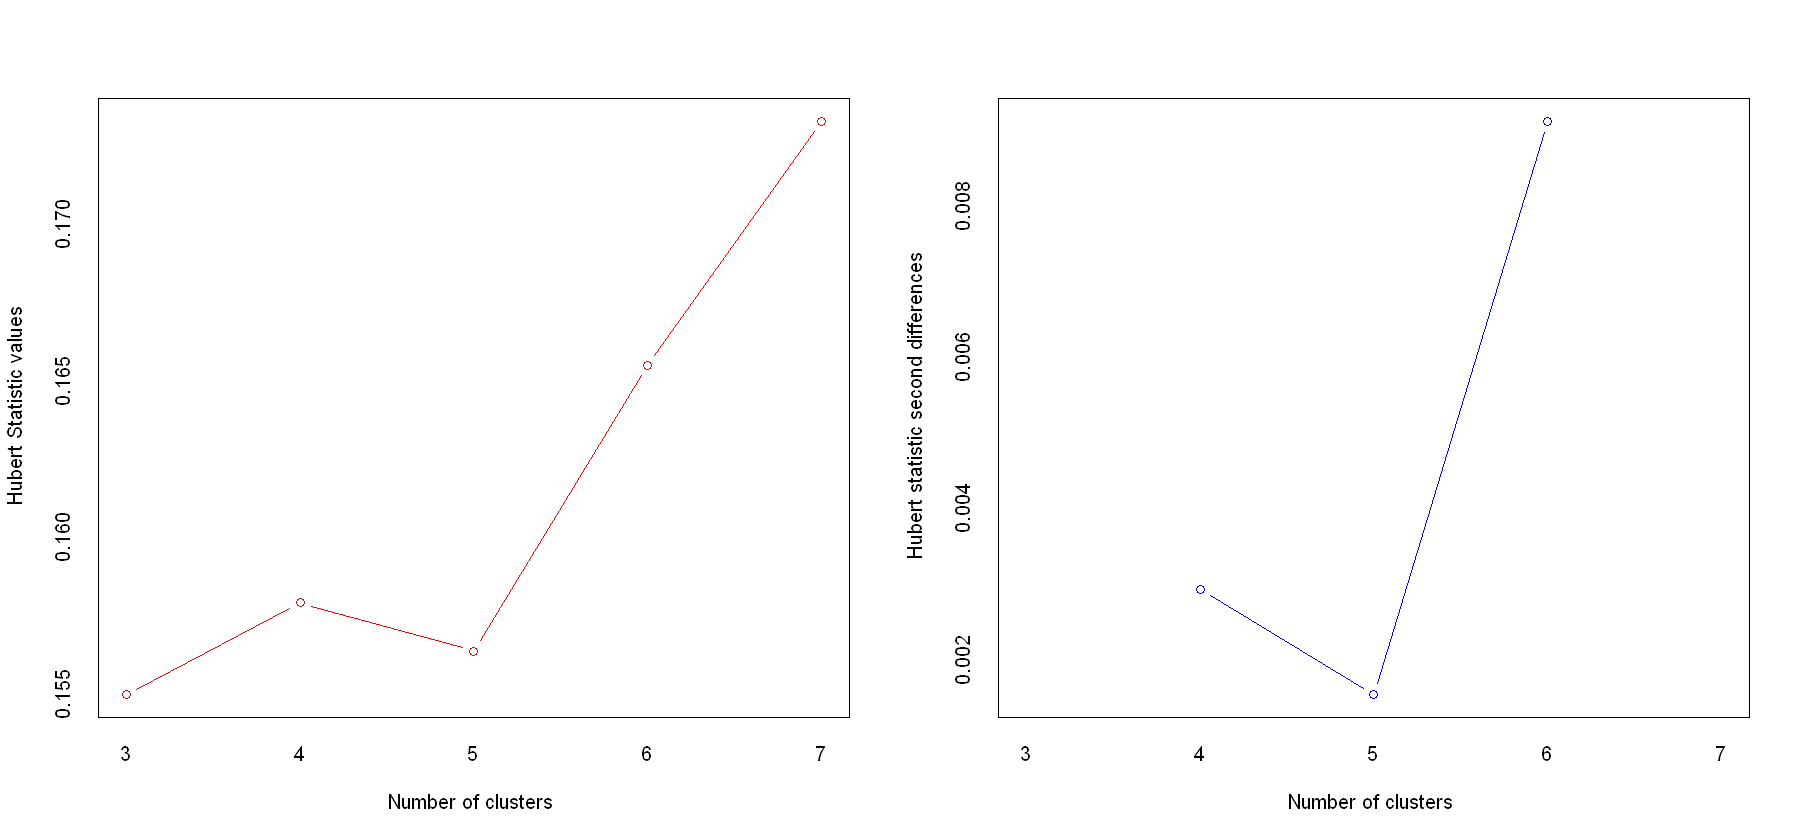

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 4 proposed 3 as the best number of clusters 
* 9 proposed 4 as the best number of clusters 
* 2 proposed 5 as the best number of clusters 
* 4 proposed 6 as the best number of clusters 
* 8 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


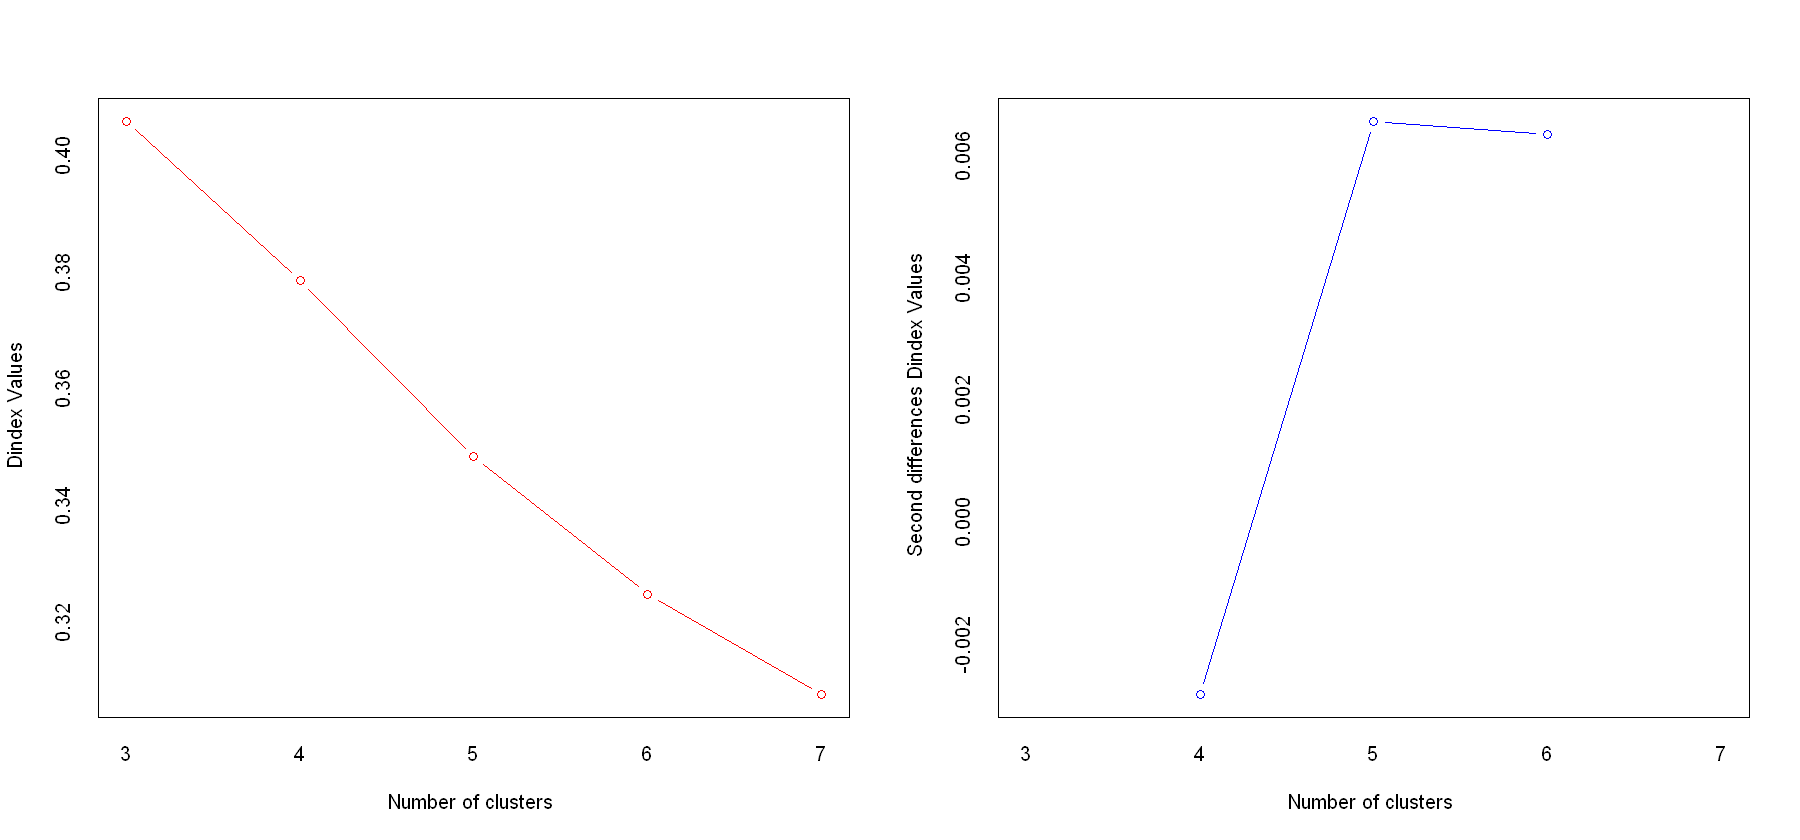

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


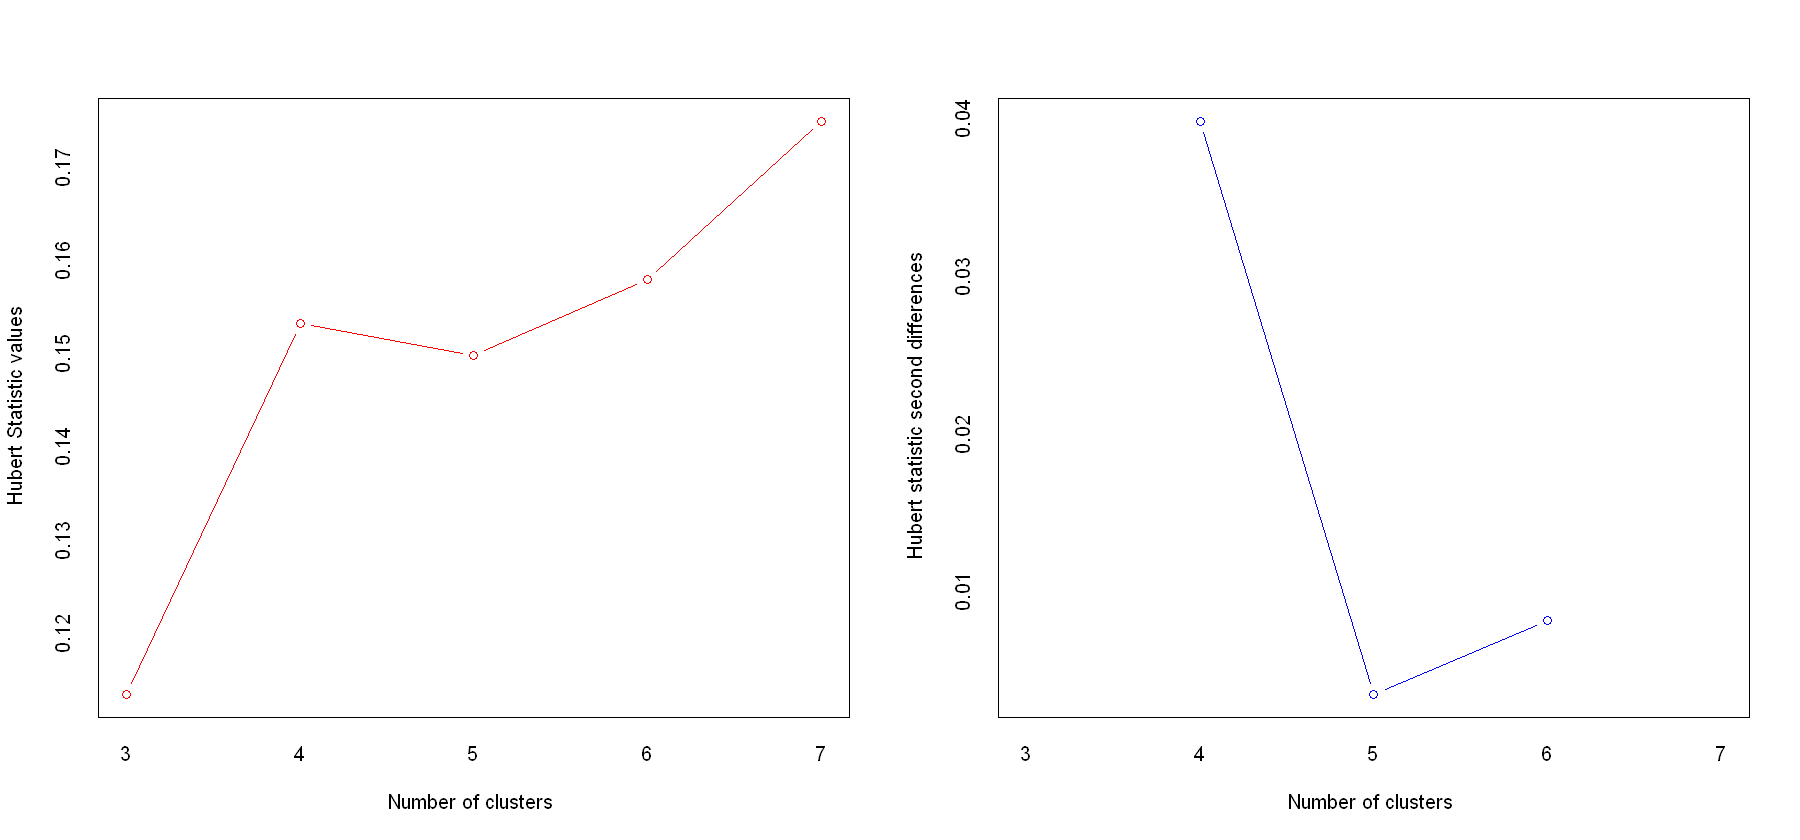

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 3 as the best number of clusters 
* 12 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 3 proposed 6 as the best number of clusters 
* 4 proposed 7 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  4 
 
 
******************************************************************* 


Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "matrix") .viz_NbClust(x, print.summary, :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "numeric") print(best_nc) else if (class(best_nc) == :
"the condition has length > 1 and only the first element will be used"
Warning message in if (class(best_nc) == "matrix") {:
"the condition has length > 1 and only the first element will be used"


Among all indices: 
* 2 proposed  0 as the best number of clusters
* 1 proposed  2 as the best number of clusters
* 7 proposed  3 as the best number of clusters
* 4 proposed  4 as the best number of clusters
* 3 proposed  5 as the best number of clusters
* 3 proposed  6 as the best number of clusters
* 10 proposed  7 as the best number of clusters

Conclusion
* According to the majority rule, the best number of clusters is  7 .



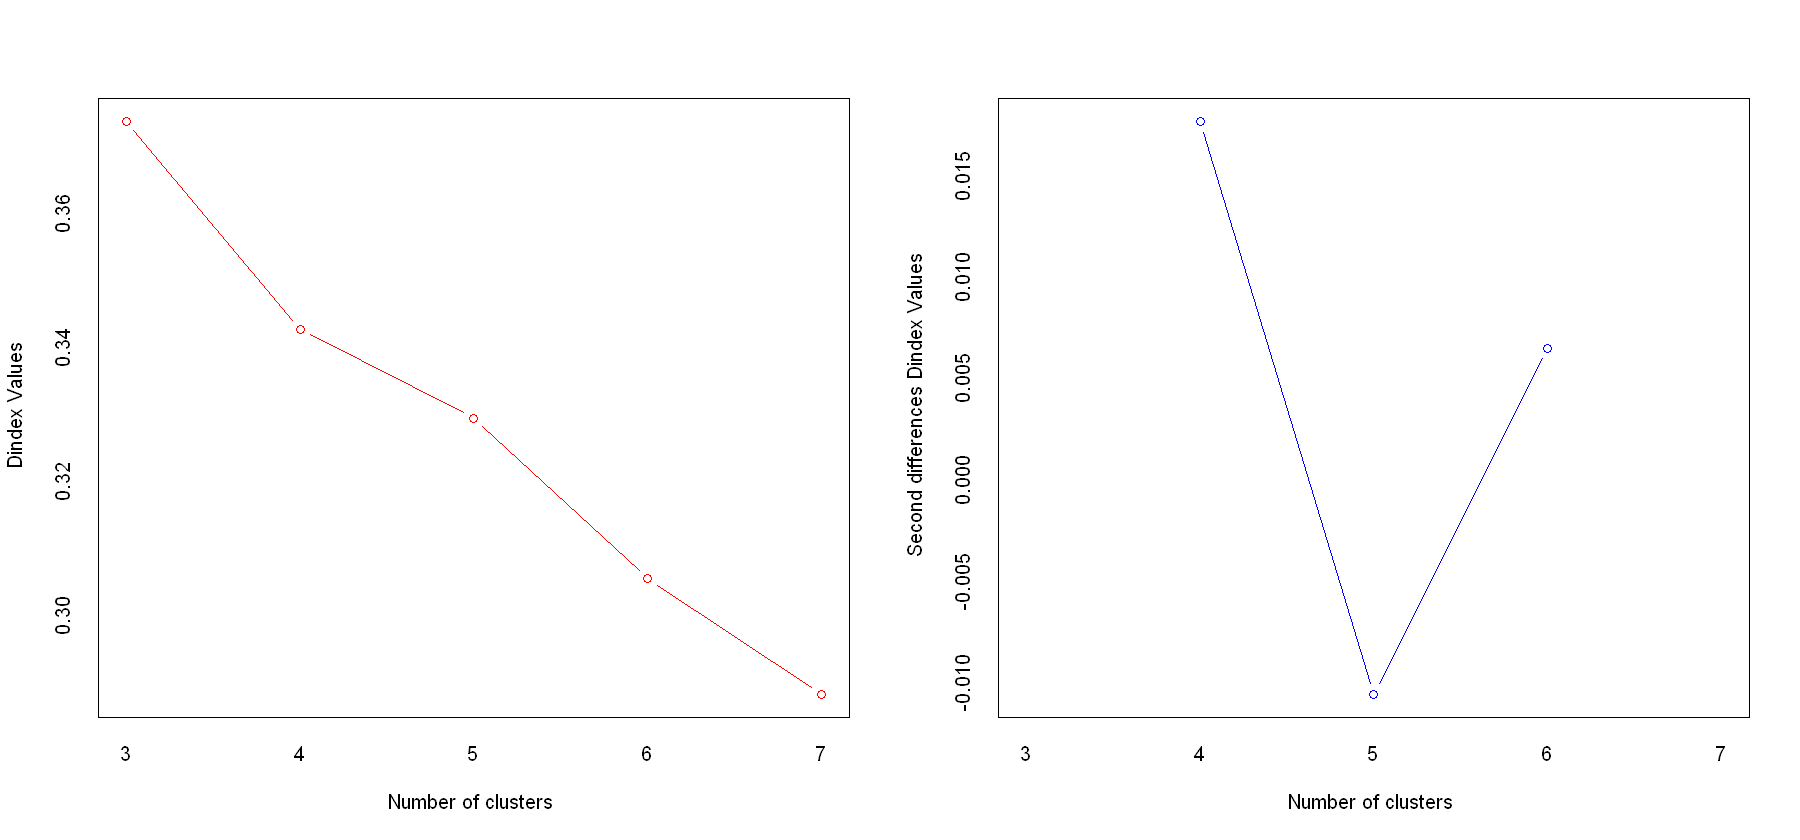

ERROR: Error in stability(optimald2, B = 73): use only with "hclustvar" objects


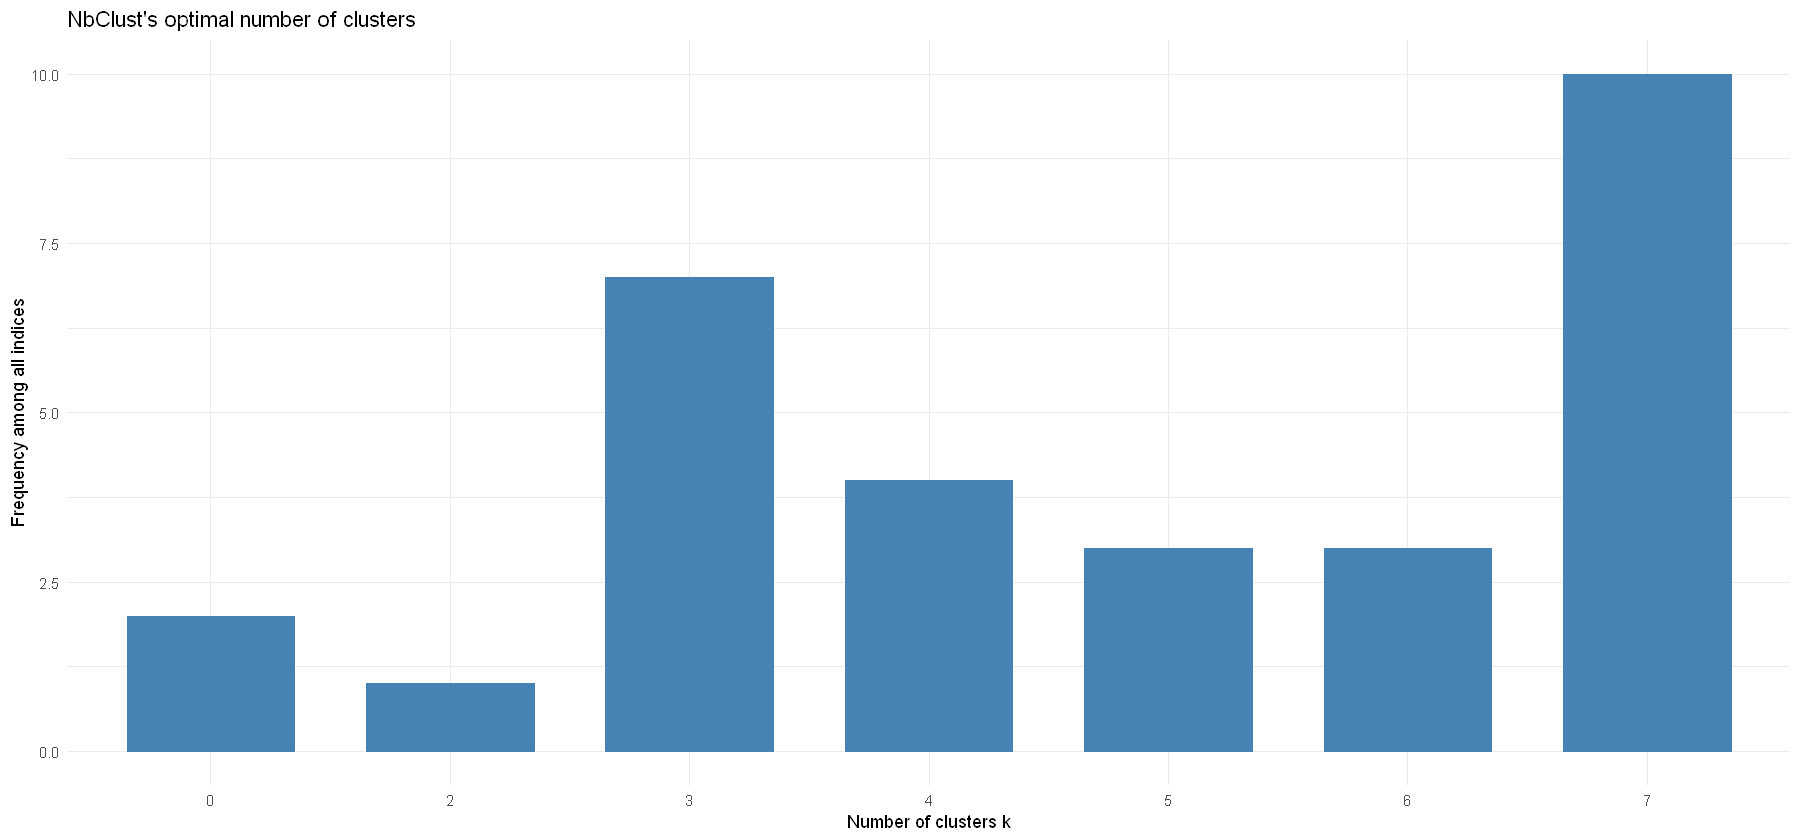

In [29]:
df.wa <- read_excel("../../results/df-seven-scores.xlsx",sheet=1)
head(df.wa,7)
summary(df.wa)
#Clustering using the optimal method
df <- df.wa[,c(2:8)]
hc.ward2=hclust(dist(df), method ="ward.D2")

options(repr.plot.width=15, repr.plot.height=7)
plot(hc.ward2, main="Countries", xlab="", 
     ylab="", cex=.9, labels=df.wa$Country)

#optimal cuts
optimald2 = NbClust(data= df, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D2", index = "alllong" ,alphaBeale = 0.1)
optimald = NbClust(data= df, distance = "euclidean", min.nc = 3, max.nc = 7, method = "ward.D", index = 'alllong',alphaBeale = 0.1)
optimalcomplete = NbClust(data= df, distance = "euclidean", min.nc = 3, max.nc = 7, method = "complete", index = 'alllong',alphaBeale = 0.1)
optimal.kmeans = NbClust(data= df, distance = "euclidean", min.nc = 3, max.nc = 7, method = "kmeans", index = 'alllong',alphaBeale = 0.1)

factoextra::fviz_nbclust(optimald2) + theme_minimal() + ggtitle("NbClust's optimal number of clusters")



Due to low number of observation of 73 countries, we want to use 3 cuts to have a better clustering affects, and is the second best cutting option, where we will get to see better clustered results

# Best cut Insight & Wisdom

,row,col
Number_clusters,1,2
Number_clusters,1,4
Number_clusters,1,14
Number_clusters,1,15
Number_clusters,1,17
Number_clusters,1,20
Number_clusters,1,22


,CH,Duda,PseudoT2,Ratkowsky,Gap,McClain
Number_clusters,3.000,3.0000,3.000,3.0000,3.0000,3.0000
Value_Index,23.663,0.6357,11.461,0.3495,-0.9487,1.1244


,CH,Duda,Pseudot2,Ratkowsky,Gap,McClain
3,23.6630,0.6357,11.4610,0.3495,-0.9487,1.1244
4,20.7867,0.7694,10.4914,0.3334,-1.3367,1.2320
5,20.1583,0.5394,13.6622,0.3222,-1.5803,1.7228
6,19.9513,0.5828,8.5913,0.3092,-1.9398,1.9161
7,19.7964,0.3670,10.3472,0.3015,-2.2621,2.0245


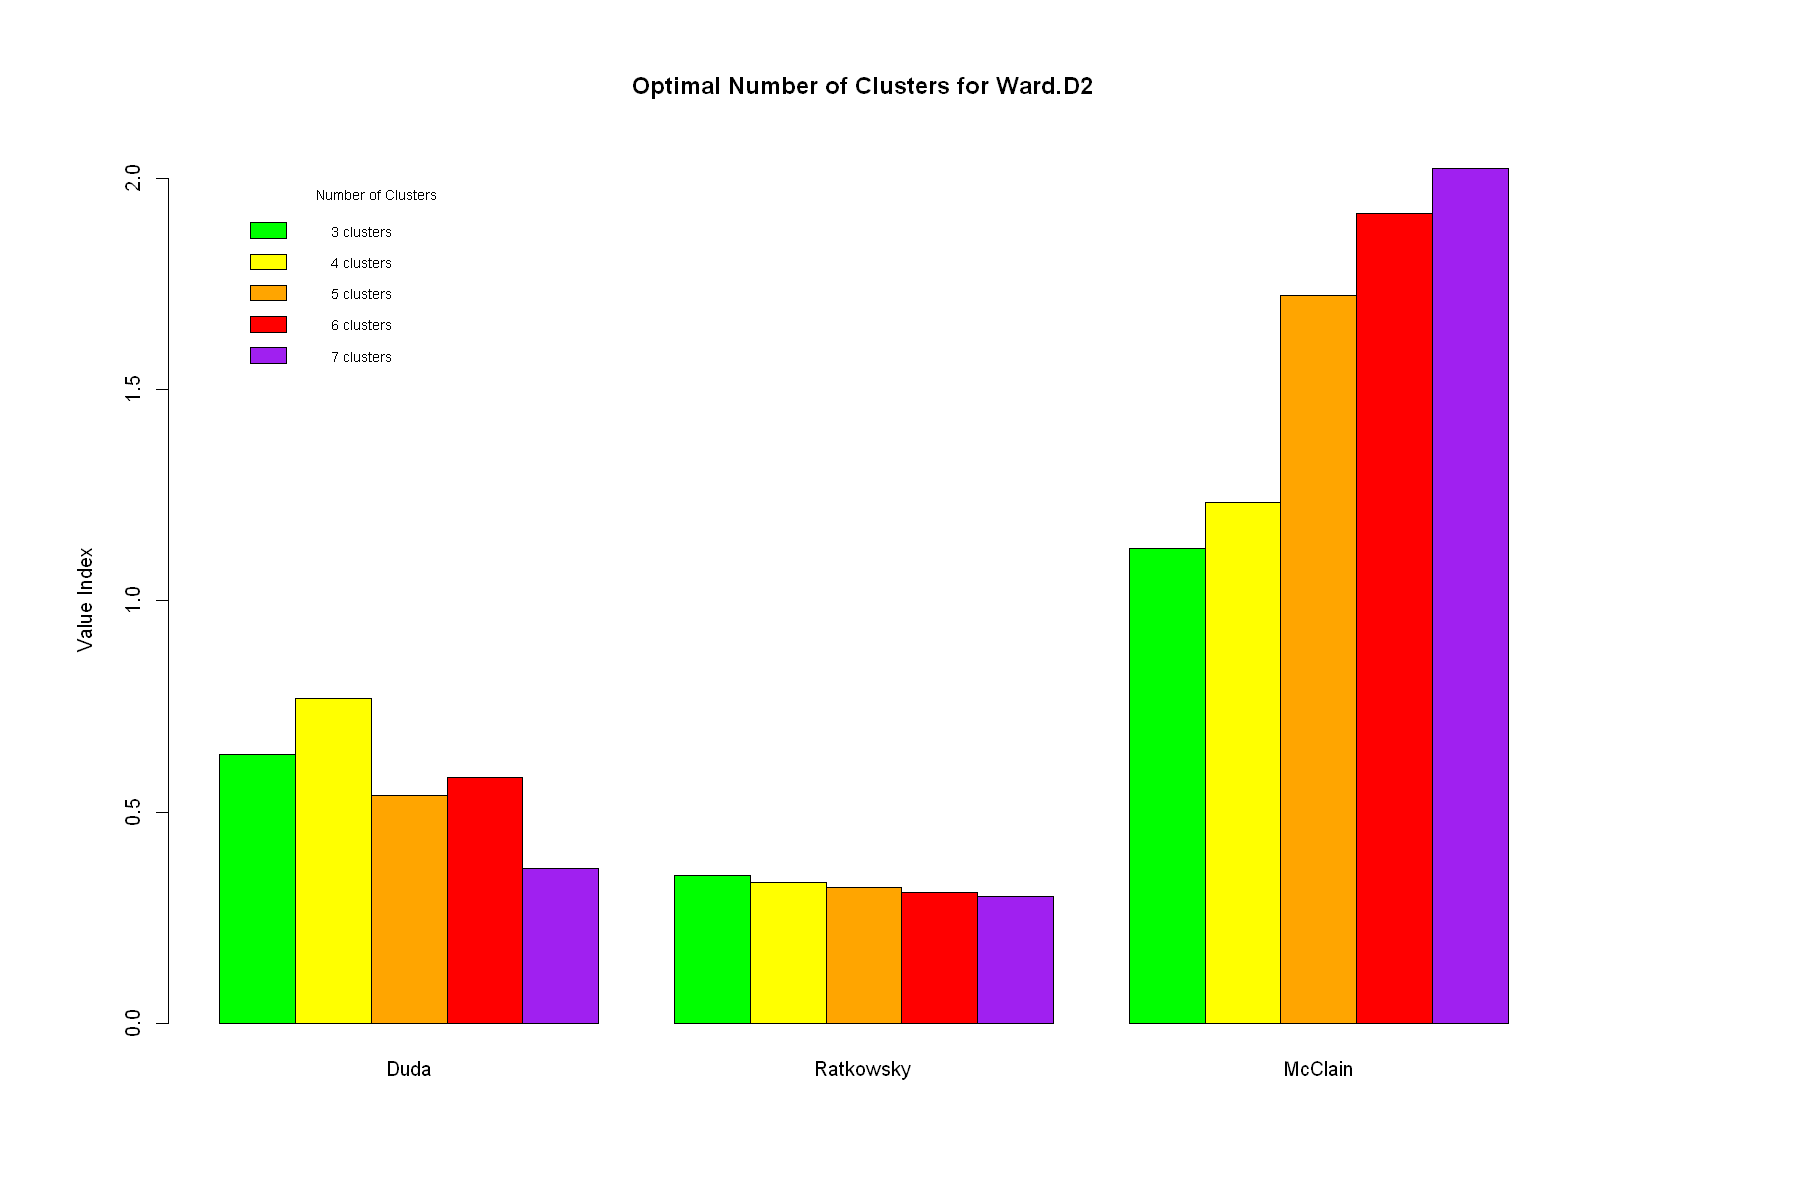

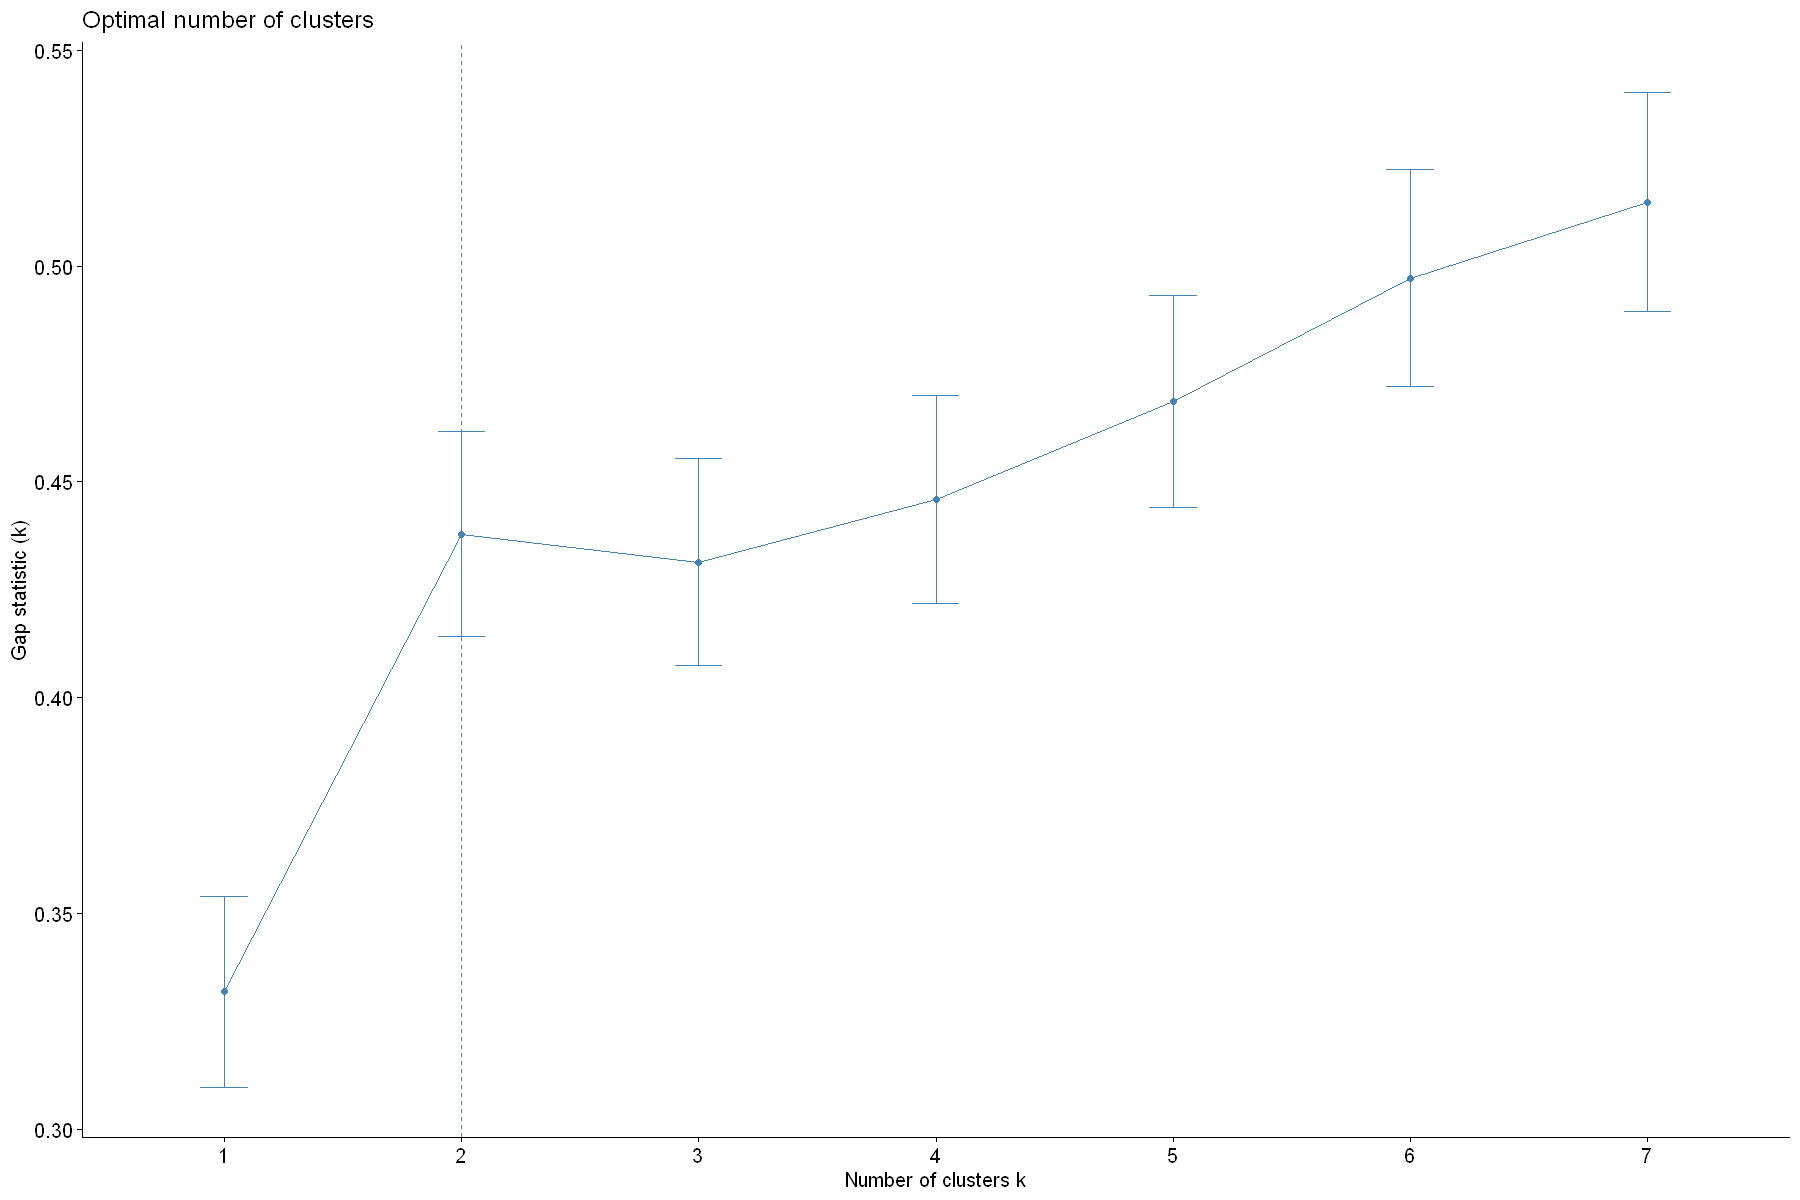

In [32]:
which(optimald2$Best.nc == 3, arr.ind=TRUE)
list(optimald2$Best.nc[,c(2,14,15,17,20,22)])
list(optimald2$All.index[,c(2,14,15,17,20,22)])

#sizing
options(repr.plot.width=15, repr.plot.height=10)
par(mar = c(7,7,7,10))

#Graph showing which is the optimal cuts
index <- optimald2$All.index[,c(14,17,22)]
barplot(index, beside = TRUE, main = "Optimal Number of Clusters for Ward.D2",
        col = c( "green","yellow","orange","red","purple"),
        ylab = "Value Index", legend = c("3 clusters","4 clusters", "5 clusters", "6 clusters","7 clusters"),        
        args.legend = list(title = "Number of Clusters", cex = .7, x = "topleft", bty = "n",inset=c(0, 0) ))

# Duda - Smallest number of clusters such that index > criticalValue
# Ratkowsky - Maximum value of the index
#22. "mcclain" or "all" or "alllong" - Minimum value of the index
set.seed(123)
gap_stat <- clusGap(df, hcut, hc_method ="ward.D2" ,
                   K.max = 7, B = 1000,  method = 'Tibs2001SEmax')
fviz_gap_stat(gap_stat)



# Dendrogram 

[1] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33"

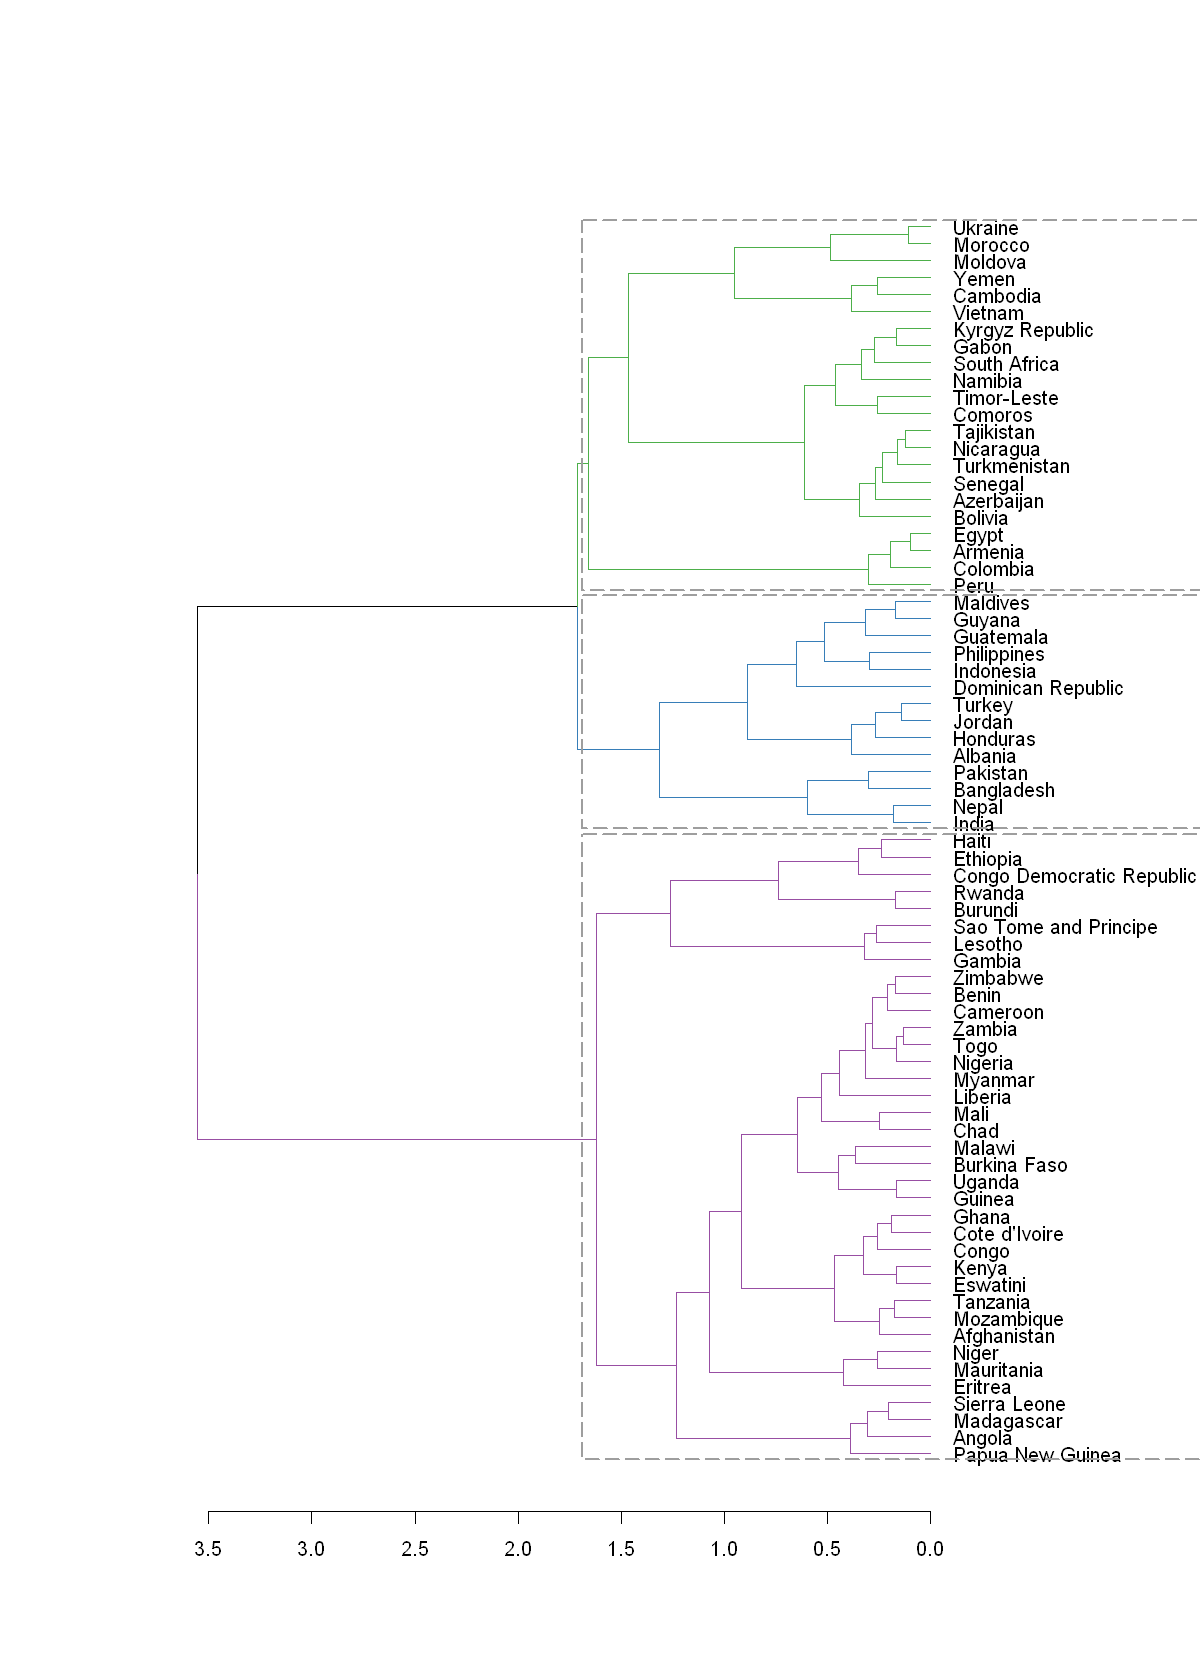

In [24]:
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
dfsimple[is.na(dfsimple)] <- 0
clusters.wa <- cutree(hc.ward2,3)     
dfsimple$clusters <- cutree(hc.ward2,3)
write_xlsx(dfsimple , '../../results/dfsimple.xlsx')

# Set1 easy to see'#E41A1C','#377EB8','#4DAF4A','#984EA3','#FF7F00'
brewer.pal(n = 6, name = "Set1") # Best color scheme is Set1 

dend <- as.dendrogram(hc.ward2 )
dend <- color_branches(dend, k=3, col = c('#984EA3','#377EB8', '#4DAF4A'))
labels(dend) <- df.wa$Country[hc.ward2$order]
#sizing
options(repr.plot.width=10, repr.plot.height=14)
par(mar = c(7,7,7,10))

dend %>% set("branches_k_color", 
             value = c('#984EA3','#377EB8', '#4DAF4A'), k = 3) %>% plot(horiz = TRUE)
dend %>% rect.dendrogram(k = 3, horiz = TRUE, border = 8, lty = 5, lwd = 2)

